In [1]:
import sys
sys.path.append('../')
import qteasy as qt
import numpy as np
import pandas as pd
%matplotlib inline

Module qteasy has been loaded successfully!, version: 0.1
tushare version: 1.2.48


In [6]:
cont = qt.Context(moq=0, mode=0)
cont.reference_asset = '000300.SH'
cont.reference_asset_type = 'I'
cont.share_pool = '000300.SH'
cont.asset_type = 'I'
cont.output_count = 30
cont.invest_start = '20020101'
cont.parallel = True
cont.print_log = True
cont.moq = 0
cont.rate = qt.Cost(buy_fix=0.0, buy_rate=0.0015, buy_min=0.0,
                 sell_fix=0.0, sell_rate=0.0, sell_min=0.0,
                 slipage=0.0)

In [47]:
class CustomRollingTiming(qt.RollingTiming):
    """自定义策略"""
    # TODO: 这里需要修改super().__init__()方法，使得所有参数的设置从该方法中解放出来，允许在self.__init__()中显性设置关键参数
    def __init__(self):
        """Crossline交叉线策略只有一个动态属性，其余属性均不可变"""
        super().__init__()
        self.par_count = 4
        self.par_types = ['discr', 'discr', 'conti', 'enum']
        self.par_bounds_or_enums = [(10, 250), (10, 250), (0.0, 10.0), ('buy', 'sell', 'none')]
        self.stg_name = 'CUSTOM ROLLING TIMING STRATEGY'
        self.stg_text = 'Customized Rolling Timing Strategy for Testing'
        self.data_types = 'close, open'
        print(f'=====================\n====================\n'
              f'custom strategy initialized, \npars: {self.pars}\npar_count:{self.par_count}\npar_types:'
              f'{self.par_types}')

    def _realize(self, hist_price, params):
        """crossline策略使用四个参数：
        s：短均线计算日期；l：长均线计算日期；m：均线边界宽度；hesitate：均线跨越类型"""
        s, l, m, hesitate = params
        # 临时处理措施，在策略实现层对传入的数据切片，后续应该在策略实现层以外事先对数据切片，保证传入的数据符合data_types参数即可
        h = hist_price.T
        # 计算长短均线之间的距离
        diff = (qt.sma(h[0], l) - qt.sma(h[0], s))[-1]
        # 根据观望模式在不同的点位产生Long/short标记
        if hesitate == 'buy':
            m = -m
        elif hesitate == 'sell':
            pass
        else:  # hesitate == 'none'
            m = 0
        if diff < m:
            return 1
        else:
            return 0


class CustomSimpleTiming(qt.SimpleTiming):
    """自定义策略"""

    def __init__(self, pars: tuple = None):
        """Crossline交叉线策略只有一个动态属性，其余属性均不可变"""
        super().__init__()
        self.par_count = 4
        self.par_types = ['discr', 'discr', 'conti', 'enum']
        self.par_bounds_or_enums = [(10, 250), (10, 250), (0.0, 10.0), ('buy', 'sell', 'none')]
        self.stg_name = 'CUSTOM SIMPLE'
        self.stg_text = 'Customized Simple Timing Strategy for Testing'
        self.data_types = 'open, close'
        print(f'=====================\n====================\n'
              f'custom strategy initialized, \npars: {self.pars}\npar_count:{self.par_count}\npar_types:'
              f'{self.par_types}')

    def _realize(self, hist_price, params):
        """crossline策略使用四个参数：
        s：短均线计算日期；l：长均线计算日期；m：均线边界宽度；hesitate：均线跨越类型"""
        s, l, m, hesitate = params
        h = hist_price.T
        # 计算长短均线之间的距离
        diff = (qt.sma(h[0], l) - qt.sma(h[0], s))
        # 根据观望模式在不同的点位产生Long/short标记
        if hesitate == 'buy':
            cat = np.where(diff < -m, 1, 0)
        elif hesitate == 'sell':
            cat = np.where(diff < m, 1, 0)
        else:  # hesitate == 'none'
            cat = np.where(diff < 0, 1, 0)
        return cat

In [48]:
cont = Context(moq=0)
    cont.reference_asset = '000300.SH'
    cont.reference_asset_type = 'I'
    cont.share_pool = '000300.SH'
    cont.asset_type = 'I'
    cont.output_count = 30
    cont.invest_start = '20020101'
    cont.parallel = True
    cont.print_log = True
    cont.moq = 0
    cont.rate = Cost(buy_fix=0.0, buy_rate=0.0015, buy_min=0.0,
                     sell_fix=0.0, sell_rate=0.0, sell_min=0.0,
                     slipage=0.0)

custom strategy initialized, 
pars: None
par_count:4
par_types:['discr', 'discr', 'conti', 'enum']
custom strategy initialized, 
pars: None
par_count:4
par_types:['discr', 'discr', 'conti', 'enum']


In [49]:
op.set_parameter('s-0', pars=(2,), sample_freq='y')

<class 'qteasy.operator.SelectingSimple'>
Strategy type: SELECTING
Information of the strategy: SIMPLE SELECTING, Selecting all share and distribute weights evenly
Optimization Tag and opti ranges: 0, [(0, 1)]
Parameter Loaded; <class 'tuple'>, (2,)
 parameter has been set to (2,)
<class 'qteasy.operator.SelectingSimple'>
Strategy type: SELECTING
Information of the strategy: SIMPLE SELECTING, Selecting all share and distribute weights evenly
Optimization Tag and opti ranges: 0, [(0, 1)]
Parameter Loaded; <class 'tuple'>, (2,)
 history looping parameter has been set to:
 sample frequency: y
 window length: None 
data types: None


In [50]:
op.set_parameter('t-0', opt_tag=1, par_boes=[(10, 250), (10, 250), (0.0, 10.0), ('buy', 'sell', 'none')])
op.set_parameter('t-1', opt_tag=1, par_boes=[(10, 250), (10, 250), (0.0, 10.0), ('buy', 'sell', 'none')])
op.set_parameter('t-2', opt_tag=1, par_boes=[(10, 250), (10, 250), (0.0, 10.0), ('buy', 'sell', 'none')])
op.set_parameter('t-3', opt_tag=1, par_boes=[(10, 250), (10, 250), (0.0, 10.0), ('buy', 'sell', 'none')])
op.set_parameter('r-0', opt_tag=1, par_boes=[(5, 14), (-0.2, 0)])

<class '__main__.CustomSimpleTiming'>
Strategy type: RICON
Information of the strategy: CUSTOM SIMPLE, Customized Simple Timing Strategy for Testing
Optimization Tag and opti ranges: 1, []
Parameter NOT loaded!
 optimizaiton tag has been set to 1
<class '__main__.CustomSimpleTiming'>
Strategy type: RICON
Information of the strategy: CUSTOM SIMPLE, Customized Simple Timing Strategy for Testing
Optimization Tag and opti ranges: 1, [(10, 250), (10, 250), (0.0, 10.0), ('buy', 'sell', 'none')]
Parameter NOT loaded!
 parameter space range or enum has been set to [(10, 250), (10, 250), (0.0, 10.0), ('buy', 'sell', 'none')]
<class '__main__.CustomSimpleTiming'>
Strategy type: RICON
Information of the strategy: CUSTOM SIMPLE, Customized Simple Timing Strategy for Testing
Optimization Tag and opti ranges: 1, [(10, 250), (10, 250), (0.0, 10.0), ('buy', 'sell', 'none')]
Parameter NOT loaded!
 optimizaiton tag has been set to 1
<class '__main__.CustomSimpleTiming'>
Strategy type: RICON
Information 

In [51]:
cont = qt.Context(moq=0)
cont.reference_asset = '000300.SH'
cont.reference_asset_type = 'I'
cont.share_pool = '000300.SH'  # '000001.SZ, 000002.SZ, 000005.SZ, 000651.SZ, 601398.SH'
cont.asset_type = 'I'
cont.output_count = 50
cont.invest_start = '20060101'
cont.moq = 1
print(cont)

<class 'qteasy.core.Context'> at 0x7fd5bac276d8qteasy running information:===========================execution mode:          1 - Back-looping Mode



In [52]:
timing_pars1 = (94, 36, 107)
timing_pars2 = {'000100': (77, 118, 144),
                '000200': (75, 128, 138),
                '000300': (73, 120, 143)}
timing_pars3 = (98, 177, 158)
timing_pars4 = (37, 44)
timing_pars5 = (228, 83, 8.05, 'buy')
op.set_blender('timing', 'cumulative')
op.set_parameter(stg_id='t-0', pars=timing_pars5)
op.set_parameter(stg_id='t-1', pars=timing_pars5)
op.set_parameter(stg_id='t-2', pars=timing_pars5)
op.set_parameter(stg_id='t-3', pars=timing_pars5)
op.set_parameter('r-0', pars=(6, -0.06))

<class '__main__.CustomSimpleTiming'>
Strategy type: RICON
Information of the strategy: CUSTOM SIMPLE, Customized Simple Timing Strategy for Testing
Optimization Tag and opti ranges: 1, [(10, 250), (10, 250), (0.0, 10.0), ('buy', 'sell', 'none')]
Parameter Loaded; <class 'tuple'>, (228, 83, 8.05, 'buy')
 parameter has been set to (228, 83, 8.05, 'buy')
<class '__main__.CustomSimpleTiming'>
Strategy type: RICON
Information of the strategy: CUSTOM SIMPLE, Customized Simple Timing Strategy for Testing
Optimization Tag and opti ranges: 1, [(10, 250), (10, 250), (0.0, 10.0), ('buy', 'sell', 'none')]
Parameter Loaded; <class 'tuple'>, (228, 83, 8.05, 'buy')
 parameter has been set to (228, 83, 8.05, 'buy')
<class '__main__.CustomSimpleTiming'>
Strategy type: RICON
Information of the strategy: CUSTOM SIMPLE, Customized Simple Timing Strategy for Testing
Optimization Tag and opti ranges: 1, [(10, 250), (10, 250), (0.0, 10.0), ('buy', 'sell', 'none')]
Parameter Loaded; <class 'tuple'>, (228, 83

preparing historical data, 
investment start date: 20041107, 
operation generation dependency start date: 20041107
end date: 20200813
shares: 000300.SH
htypes: ['open', 'close'] at frequency 'd'
Getting price type historical data...
Getting price type historical data...
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3553 entries, 2006-01-04 to 2020-08-13
Data columns (total 1 columns):
000300.SH    3553 non-null float64
dtypes: float64(1)
memory usage: 55.5 KB

<class 'qteasy.history.HistoryPanel'>
History Panel at 0x7fd5bb2d7e10
Datetime Range: 3795 entries, 2005-01-04 00:00:00 to 2020-08-13 00:00:00
Historical Data Types (total 2 data types):
['close', 'open']
Shares (total 1 shares):
non-null values for each share and data type:
           close  open
000300.SH   3795  3795
memory usage: 60848 bytes

reference hist data downloaded, info: 
None
operation hist data downloaded, info: 
None
       RUNNING IN MODE 1
      --Back-looping Mode--

交易日期:2006/08/02
考虑现金增值, 上期现金: 0.00, 经

/Users/jackie/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in less


           LOOPING RESULT

qteasy running mode: 1 - History back looping
time consumption for operate signal creation: 23.4ms ms
time consumption for operation back looping: 151.1ms ms

investment starts on 2006-08-02 00:00:00
ends on 2020-08-13 00:00:00
Total looped periods: 14.0 years.
operation summary:
            sell  buy  total
000300.SH     7    7     14
Total operation fee:     ¥     152.43
total investment amount: ¥  10,000.00
final value:             ¥  15,539.60
Total return: 155.396% 
Average Yearly return rate:  3.199%
Total reference return: 363.560% 
Average Yearly reference return rate: 9.629%
strategy performance indicators: 
alpha:               -0.003
Beta:                0.002
Sharp rate:          -0.031
250 day volatility:  0.101
Max drawdown:        13.928% on 2014-02-25 00:00:00

===========END OF REPORT=============

preparing historical data, 
investment start date: 20041107, 
operation generation dependency start date: 20041107
end date: 20200813
shares: 0003

/Users/jackie/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in less
/Users/jackie/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in less
/Users/jackie/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in less
/Users/jackie/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in less
/Users/jackie/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in less
/Users/jackie/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in less
/Users/jackie/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in less


Optimization progress: [####------------------------------------] 30/300. 10.0%  

/Users/jackie/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in less


Optimization progress: [########################################] 300/300. 100.0%  
Optimization completed, total time consumption: 7"022

==========SEARCHING FINISHED===============
Searching finished, 50 best results are generated
The best parameter performs 1.610 times better than the least performing result
best result: 96560.370 obtained at parameter: 
(63, 71, 5.734127044822407, 'sell', 134, 201, 7.817378955249285, 'buy', 203, 95, 4.16607382590827, 'buy', 78, 239, 6.790877376618758, 'none', 7, -0.13884272761765704)
least result: 59981.669 obtained at parameter: 
(211, 148, 5.911230473695505, 'buy', 120, 39, 6.138420309723761, 'sell', 203, 148, 6.545839178832155, 'buy', 97, 197, 5.617588734373042, 'none', 11, -0.15018665863151548)
complete list of performance and parameters are following, 
                                                               0
(211, 148, 5.911230473695505, buy, 120, 39, 6.1...  59981.668965
(167, 193, 0.44883078729492376, none, 164, 112,...  60092.539338

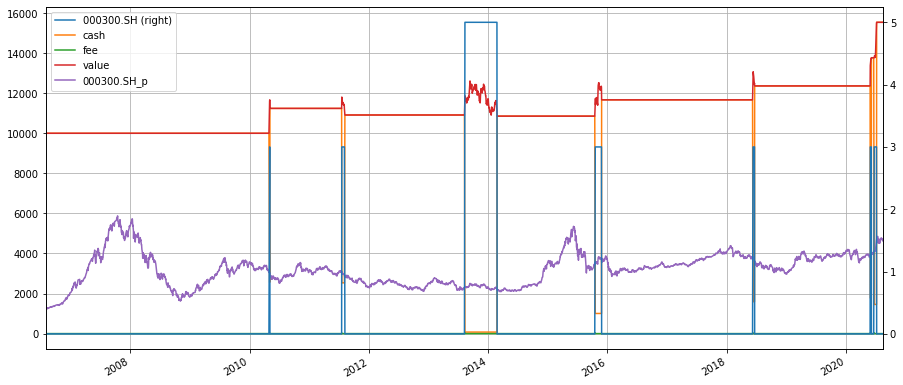

In [53]:
cont.parallel = True
cont.mode = 1
qt.run(op, cont)
cont.mode = 0
qt.run(op, cont)
cont.mode = 2
cont.opti_method = 1
cont.opti_method_sample_size = 300
cont.opti_method_step_size = 32
cont.opti_method_init_step_size = 16
cont.opti_method_min_step_size = 1
cont.opti_method_incre_ratio = 2
qt.run(op, cont)